# Data Privacy and Security Project
### Flaminia Spasiano 1889394
|Goal : Primality Testing. The goal of this project is to better understand the task of primality testing. Write a program (using your favourite programming language) implementing the following primality testing algorithms: The Fermat's Test and the Miller-Rabin Test. Compare the performances of the two tests. |
|---|

| What I have done: I implemented Fermat's Test, Miller-Rabin Test, Solovay-Strassen test and a simple factoring algorithm in Python. Described the theory behind them, along with advantages and disadvantages. Then compared the performance of these tests in terms: of complexity, running time and accuracy. Set of numbers considered: generic primes and composites, Mersenne numbers and Fermat numbers.|
|---|


#### __Why do we care about prime numbers?__ 
Prime numbers always had an important role in the development of mathematics. In particular the problem of determining whether a given integer is prime or not is one of the better known and most easily understood problems of pure mathematic. In 300BC, Euclid was able to prove that there were infinitely many primes and the Fundamental Theorem of Arithmetic, states that every integer is defined as the unique product of powers of prime numbers. Later on, greek mathematicians discovered the Sieve of Eratosthenes, which represents a basic approach in counting primes smaller than a given number. It's a trivial primality testing that becomes inefficient and too expensive to implement when the magnitude of the number increases. For instance, McGregor-Dorsey explained in that for an input number of 20 digits, at a rate of discovering one prime number per second, it would take more than 14 years to determine the primality of the number. 

The advent of cryptographic systems that use large primes was the main driving force for the development of fast and reliable methods for primality testing. Over the last decades primes became one of the main tools of many cryptography applications and many protocols are based on prime numbers,for example RSA, in which one needs to produce large prime numbers.

There are two ways to assert the primality of a number: using __factorization__ algoritms or use __primality__ tests. 
- Factorization algorithm might be seen as more interesting, because they give more information about a number, not only if it's a prime or not, but also its unique factorization. And being able to factorize a number for an attacker might be the way of breaking security of a cryptosystem. For example in RSA we perform the protocol in $\mathbb{Z}_n$ with $n = p \cdot q$ (product of two large primes), so if we are able to factorize $n$, we can compute $\phi(n)$ that is the number of natural numbers coprimes with $n$. Computing $\phi(n)$ allow us to find the multiplicative inverse of $e$ $\mod{\phi(n)}$, that is the secret key $d$, so break the protocol. However factorization is an hard problem.
- On the other side it's easier to test if a number is a prime or not, and even more easier to test if $m \mid n$.


__Theorem__: There are infite prime numbers.

PROOF: This proof was made by Euclid and is the most famous. It follows by absurd. We assume there are *finite* prime numbers, say $P = \{p_1,..., p_k\}$. Given the number $n = p_1 \cdot... \cdot p_k +1$. Then since $P$ is finite, $n$ is not divisible by any of the primes in $P$ and $n$ is not factorizable, that is impossible. So there are an infinte numbers of primes.  QED



#### __Basic tests__:
- We have cited Sieve of Eratosthenes that is an easy method to find all primes smaller that a value $n$. This is quite expensive, indeed the basic algorithm requires $\mathcal{O}(n)$ of memory. 
- Another one we all know from primary school is the following: given any number $n$, we check all numbers less than or equal to $\sqrt{n}$ and see if any of them divides $n$. If at least one ($\not=1$) of them does, the algorithm outputs composite, otherwise it outputs prime. This follows from the fact that if it's indeed composite, it must be possible for us to factor it into at least two factors and at least one of them must be less than or equal to $\sqrt{n}$.  However, this test, that is also a __factoring algorithm__ involving $\sqrt{n}$ operations, is $\mathcal{O}(\sqrt{n})$ and hence the algorithm becomes computationally infeasible for large numbers. I implemented a very basic version of this test just to compare it computationally speaking with the others.

A __primality test__ does not give any information about the factorization, it only provides an answer to the question: is this number prime or not? The idea behind probabilitic primality tests is to levergae on prime properties without looking for factors. A probabilistic primality repatedly test tries to prove that a number behaves as a primes.

Primality tests can be classified based on the form of the given number which is going to be tested. There are tests for numbers of special forms, and there are tests for generic numbers such as Fermat, Miller-Rabin, Solovay-Strassen test. I implemented and evaluated the performance of these three algorithms on generic numbers and paricular ones.

Primality tests can be classified as __deterministic__ or __probabilistic__. The main difference is that deterministic tests behave predictably and can establish exactly if a given number is prime or not, whereas the probabilistic tests can, with low error probability, classify a composite number as being prime. Even if probabilistic tests, cannot assure always max accuracy, they are more efficient to use instead of deterministic algorithms. Infact they may become impractical for large numbers.


A probablistic test $T$ is a sequence of tests $\{T_m\}_{m \in \mathbb{N}}$ and a sequence of $\{\epsilon_m\}_{m \in \mathbb{N}}$ such that the test $T_i$:
- If $n$ doesn't pass test $T_i$ than it's not prime and outputs composite, otherwise $n$ goes to the next test $T_{i+1}$;
- The probability that $n$ passes tests $T_1,...,T_m$ not being prime is $<\epsilon_m$.


#### __Useful definitions and notations__

A __Fermat Number__ is a number of the form: $F_n = 2^{2^m}+1$. This sequence grows incredibly fast: $F_0 = 3, F_1 = 5, F_2 = 17, F_4 = 65537$. If $2^k + 1$ is prime and $k > 0$, then $k$ must be a power of $2$, so $2k + 1$ is a Fermat number; such primes are called Fermat primes  of the form $2^{2^n} + 1$. A Fermat conjecture says all Fermat numbers are prime, however it was found to be false, in fact $F_5 = 4294967297$ is composite ($F_5 = 641\cdot 6700417$)

A __Mersenne Number__ is a number of the form $M = 2^k-1$, with $k$ prime. Notice that if $M$ is prime, then it is called a Mersenne prime number.

__Notation__:
- $(\frac{a}{p})$ with $p$ prime, is the *Legendre* symbol;
- $(\frac{a}{n})$  with $n$ composite is the *Jacobi* symbol. $n= p_1^{c_1}\cdot ... \cdot p_k^{c_k}$ and $(\frac{a}{n})= \prod_{i=1}^k(\frac{a}{p_i})^{c_i}$;
- *Euler criterion*: Given $p$ prime and $a$ such that $(a,p)=1$, then  $(\frac{a}{p})\equiv a^{\frac{p-1}{2}} \mod{p} $;
- The *Square \& Multiply* algorithm to compute modular exponentiation $g^a\mod{n}$ has complexity $\mathcal{O}(\log^3(n))$. 


## __Fermat's Test__

This test is based on __Fermat's Little Theorem__: If p is prime, then $\forall a \in \mathbb{Z}$, $a^p\equiv p \mod{p}$, Which means that is $p\nmid a$, then :$$a^{p-1}\equiv 1 \mod{p}$$

__Fermat Test__: Given a number $n$ and an $a\leq n-1$ and $p\nmid a$:
1. if $a^{n-1}\not \equiv 1\mod{n}$, then $N$ is not a prime.
2. If $a^{n-1} \equiv 1\mod{n}$, then we can't say anything. 

A composite number $n$ that passes Fermat test for a particular base $a$ is called __pseudoprime in base__ $a$, and $a$ is called __Fermat Liar__, $n = PSP(a)$. For example, $341 = 11 \cdot 31$, but $2^{340} \equiv 1 \mod{341}$, so $341 = PSP(2)$.

A __Charmichael Number__ is a composite number that passes Fermat Test for every possible base $a$. In other words, $\forall a$ such that $1\leq a \leq n-1$ and $(a,n)=1$, $n$ is a composite number and $a^{n-1} \equiv 1\mod{n}$. (an example is $561 = 3 \cdot 11 \cdot 17$). Carmichael numbers are fairly sparse, but infinite.


#### __Probabilistic Fermat Test__
The probabilistic Fermat Test is based on Fermat test. It is indeed constructed in this way: 
- pick an appropriate value $m$, 
1. repeat $m$ times the following:
    - pick a random base $a$ coprime with $n$,
    - do Fermat test: compute $a^{n-1}\mod{n}$. If $a^{n-1}\equiv 1 \mod{n}$ then $n$ go to the next test
2. If the number succeds all the test, then we can say that with high probability it is a prime. If it is rejected by one test, we call it composite. 

At every step $i$, the if $n$ succeds the test $i$, then it's a *pseudoprime* in a particular base. The key point is: if a number is pseudoprime for a sufficiently large set of bases, than with high probability $n$ is actually prime.

__Complexity__: Using the S\&M algorithm for modular exponentiation, the time complexity of this test id $\mathcal{O}(m\cdot \log^3(n))$.

The Fermat Test is fast and easy to implement. The test does however have  a  serious  flaw:  Carmichael numbers completely fools  it, the big problem is that there are infinitely many Carmichael numbers. Thus these numbers cause the test to wrongly claim them as prime. 

The probability of error can be made arbitrary small by picking a large number of bases. But the probability of error is $1$ for Carmichael numbers.

| Test | Pros | Cons | Computational Complexity | Probability of Error |
| --- | --- | --- | --- | --- |
| Fermat | Fast | Carmichael numbers <br> It cannot determine the number of Fermat liars for a pseudoprime| $\mathcal{O}(m\cdot \log^3(n))$ | Probability of failure for Carmichael numbers is 1 |



## __The Miller Rabin Primality Test__

The Miller-Rabin Test improves on the weaknesses of the Fermat Test. It consists in a sequence of $m$ test $\{T_m\}_{m\in\mathbb{N}}$ and $\{\epsilon_m\}_{m\in\mathbb{N}}$ . A test $T_i$ is composed by the following steps:

1. Pick a random $b_i$ $(\not = b_1 ...\not =b_{i-1})$, write $n-1 = 2^s \cdot t$ with  $t$ odd.
2. compute $(b_i,n)$. 
    - If it is $>1$ than we can conclude the test and say $n$ is not prime (and we also have information about the factorization). 
    - If it is $=1$,  then we can start the test $i$.
3. Since $(b_i,n)=1$,
    - Do
        - Compute $b_i^t$ and if $b_i^t \not \equiv \pm 1$
        - then compute $b_i^{2^1t}$ and if $b_i^{s^1t} \not \equiv \pm 1$
        - then compute $b_i^{2^2t}$ and if $b_i^{s^2t} \not \equiv \pm 1$
        - ...
        - compute $b_i^{2^{s-1}t}$ and if $b_i^{2^{s-1}t} \not \equiv \pm 1$, then $n$ is composite.
    - otherwise if:
        - $b_i^t \equiv \pm 1$ or 
        - or $\exists 0\leq r < s$ such that $b_i^{2^{r}t} \not \equiv -1$, then $n$ pass the test and text test is performed.
        

The probability that $n$ succedd until test $i$ without being prime is $\leq \frac{1}{4^i}$. So with a large enough $m$ (say $\approx 30$) we can conclude $n$ is prime. 

__The test relies on__ theorems and results in __number theory__ that I can summarize in:

1. If $p$ is prime, then $p-1= 2^s t$, while computing $b^t, b^{2t},..., b^{2^{s-s}t}$ we will find that one of these values is equivalent to a $-1$ and then the next iteration we'll get a $1$. This is because $b^{p-1} \equiv 1 \mod{p}$ (PTF) and due to the fact that $\mathbb{Z}_p$ is a field and in this field the equation $x^2-1\equiv 0 \mod{p}$ has __only__ two __trivial__ solutions $x = \pm 1$.
2. On the other hand if $n$ is composite, then $n -1 = 2^s t$, and computing $b^t, b^{2t},..., b^{2^{s-1}t}$ it might happen to find $b^{2^{k}t}\equiv 1 \mod{n}$ but its square root $b^{2^{k-1}t}\not \equiv \pm 1 \mod{n}$, which means that we obtained a non trivial solution, so $n$ fails the test.

Composite numbers that pass one iteration of Miller-Rabin test are called __strong-pseudoprimes__ and they are much fewer than the pseudoprimes.

__Complexity__: Using the S&M algorithm, Miller-Rabin tests the primality of any odd number $n$ in time $\mathcal{O}(m \cdot log^3(n))$ (thanks to FFT-based multiplication it's possible to push the running time down to $\mathcal{O}(m\cdot \log^2(n) \cdot \log(\log(n))\cdot \log(\log(\log(n)))) = \tilde{\mathcal{O}}(m\cdot \log^2(n)))$ [5]).

| Test | Pros | Cons | Computational Complexity | Probability of Error |
| --- | --- | --- | --- | --- |
| Fermat | Fast | Carmichael numbers <br> It cannot determine the number of Fermat liars for a pseudoprime| $\mathcal{O}(m\cdot \log^3(n))$ | Probability of failure for Carmichael numbers is 1 |
| Miller-Rabin | Very fast<br>Very small probability of error<br>Strong-pseudoprimes are fewer than pseudoprimes | Strong-pseudoprimes fools it| $\tilde{\mathcal{O}}(m\cdot \log^2(n))$ | $<4^{-m}$|

## __Solovay Strassen Primality Test__

The test is based on __Euler's criterion__: Let $p$ be an prime and $b$ be an integer coprime to $p$. Then: $$ b^{\frac{p-1}{2}} \equiv \Big(\frac{b}{p}\Big) \mod{p}$$

The Solovay Strassen test consists in a sequence of $m$ test $\{T_m\}_{m\in\mathbb{N}}$ and $\{\epsilon_m\}_{m\in\mathbb{N}}$ . A test $T_i$ is composed by the following steps:
1. Pick a random $b_i$ ($\not = b_1 ...\not =b_{i-1}$).
2. compute $(b_i,n)$. 
    - If it is $>1$ than we can conclude the test and say $n$ is not prime (and we also have information about the factorization). 
    - If it is $=1$,  then we can start the test $i$.
3. Since $(b_i,n)=1$, compute $(\frac{b_i}{n})$ and $b_i^{\frac{n-1}{2}}$.
    - If $(\frac{b_i}{n}) \not \equiv b_i^{\frac{n-1}{2}} \mod{n}$ then we conclude $n$ is not prime.
    - If $(\frac{b_i}{n}) \equiv b_i^{\frac{n-1}{2}} \mod{n}$ then $n$ is potentially prime.
The probability that $n$ succedd the test $m$ without being prime is $\leq \frac{1}{2^i}$. So with a large enough $m$ (say $\approx 30$) we can conclude $n$ is prime. 

The Solovay Stassen test relies on Euler's Criterion and the following theorem that assure: that if $n$ is compsite, then a particular equivalence is not satisfied for a given base $b$. 

__Theorem__: If $n$ is an odd composite number, there exists a $b$, $(b,n)= 1$ such that $(\frac{b}{n}) \not \equiv b^{\frac{n-1}{2}} \mod{n}$. 

Note that the theorem is not a iif condition, in fact if $(\frac{b}{n}) \equiv b^{\frac{n-1}{2}} \mod{n}$ it does not means that $n$ is not composite (prime). But if we test the condition with a large set of bases, then $n$ is a prime with high probability.


A composite number $n$ that passes the Euler test for a particular base $b$ is called *Euler pseudoprime in base $b$*, so $n = PSPE(b)$.

The key point of the probabilistic Solovay Strassen test is that at if a number is EPSP for a sufficiently large set of bases, than with high probability $n$ is actually prime.

__Complexity__: Computing the Jacobi symbol $(\frac{b}{n})$, that adds more computation, is isomorphic to computing $(b, n)$; this can be done in $\mathcal{O}(log^2(n))$, and thus the cost of whole algorithm the sum of: finding gcd, computing of Jacobi symbol, and computing powers of $b$. The complexity is $\mathcal{O}(m \cdot \log^2(n)) + \mathcal{O}(m\cdot \log^2(n))+ \mathcal{O}(m\cdot \log^3(n)) \sim \mathcal{O}(m\cdot \log^3(n))$. 

| Test | Pros | Cons | Computational Complexity | Probability of Error |
| --- | --- | --- | --- | --- |
| Fermat | Fast | Carmichael numbers <br> It cannot determine the number of Fermat liars for a pseudoprime| $\mathcal{O}(m\cdot \log^3(n))$ | Probability of failure for Carmichael numbers is 1 |
| Miller-Rabin | Very fast<br>Very small probability of error<br>Strong-pseudoprimes are fewer than Pseudoprimes | Strong-pseudoprimes fools it| $\tilde{\mathcal{O}}(m\cdot \log^2(n))$ | $<4^{-m}$|
| Solovay-Strassen | Fast <br> Euler pseudoprimes are much less dense than pseudoprimes | Euler Pseudoprime fools it | $\mathcal{O}(m\cdot \log^3(n))$| $<2^{-m}$ |

__In conclusion theoretically__: 
- Fermat Test is very fast and quite accurate, but the problem of Carmichael number constitutes a big issue in using this test. Solovay-Strassen can be more expansive and on a average its failure probability is twice that of Miller-Rabin’s, so normally Miller-Rabin's test is used to decide whether an odd number is prime or not in time $\tilde{\mathcal{O}}(m \log^2(n))$; the probability that it erroneously calls 'prime' a composite number is less than $4^{-m}$.

### Let's see now my implementation and practical results

In [1]:
#number of iterations
m = 100

Prime = True
Composite = False

# imporr the module where all the functions are
import functions_1889394 as functions

## Generic numbers that are going to be tested
The input are the numbers of various sizes, starting from 2 digits to 100 digit. There are 2 representative numbers for each of the considered number of digits, a prime numbers and composite numbers.

| Number | #digits | Composition |
| --- | --- | --- |
| 13 | 2 | Prime |
| 34 | 2 | Compsite |
| 991 | 3 | Prime |
| 169 | 3 | Compsite |
| 3793 | 4 | Prime |
| 7621 | 4 | Composite |
| 11621 | 5 | Prime |       
| 10036 | 5 | Composite |
| 5915587277 | 10 | Prime |
| 2860486317 | 10 | Composite |
| 29497513910652490397 | 20 | Prime |
| 12764787846358441471 | 20 | Composite |
| 590872612825179551336102196593 | 30 | Prime |
| 280829369862134719390036617061 | 30 | Composite |
| 2425967623052370772757633156976982469681 | 40 | Prime |
| 2425967623052370772757633156976982469682 | 40 | Composite |
| 29927402397991286489627837734179186385188296382227 | 50 | Prime |
| 54987541231012456465487987654132654568741532457817 | 50 | Composite |
| 470287785858076441566723507866751092927015824834881906763507 | 60 | Prime |
| 574876541556778984542315454987666541234557898465415657795415 | 60 | Composite |
| 5850725702766829291491370712136286009948642125131436113342815786444567 | 70 | Prime |
| 423708097986860774275080860084663831802286359314777473955642794329 | 70 | Composite |
| 34263233064835421125264776608163440537925705997962346596977803462033841059628723 | 80 | Prime |
| 14759984361802021245410475928101669395348791811705709117374129427051861355011151 | 80 | Composite |
| 463199005416013829210323411514132845972525641604435693287586851332821637442813833942427923 | 90 | Prime |
| 370332600450952648802345609908335058273399487356359263038584017827194636172568988257769603 | 90 | Composite |
| 2074722246773485207821695222107608587480996474721117292752992589912196684750549658310084416732550077 | 100 | Prime |
| 2193992993218604310884461864618001945131790925282531768679169054389241527895222169476723691605898519 | 100 | Composite |


As you can see there are also more numbers, in particular 20 primes and 20 composite to even more test the algorithms.

|#Digits |Prime Numbers| Composites Numbers |
|---|---|---|
| 10 |3267000013 | 6198669063|
| 10 |5915587277| 4765202170|
| 20 |48112959837082048697 |76263224987803629328 |
| 20 |54673257461630679457| 17423384515502858017|
| 30 |671998030559713968361666935769 |578766443293888611474166490469 |
| 30 |282174488599599500573849980909| 448604051580451278912136018920|
| 40 |2425967623052370772757633156976982469681 | 7615353861114413114504570241353393569583 |
| 40 |1451730470513778492236629598992166035067| 1947696553298278688510306641702775894463 |
| 50 |22953686867719691230002707821868552601124472329079| 75128567454332200997487059387406395854249942560639 |
| 50 |30762542250301270692051460539586166927291732754961  | 25512976467887390219455576966561642372607061829171   |          
| 60 |622288097498926496141095869268883999563096063592498055290461|350724107805662340204391321697711724650837028619404411998100 |
| 60 |610692533270508750441931226384209856405876657993997547171387| 283853317129073568596730410492507334220655195793712288798718 |
| 70 |5885903965180586669073549360644800583458138238012033647539649735017287| 4448822320341298002327767469322167218785631231602699883049759451980034 |
| 70 |3773180816219384606784189538899553110499442295782576702222280384917551 |2524252130882273102040850065646873717114946297391270905937770144764029 |
| 80 |18532395500947174450709383384936679868383424444311405679463280782405796233163977| 35164229577514178181168622408091604002805565338433768558910859481454836351654907 |
| 80 |44822481511601066098713481453161748979849764719554039096395688045048053310178487| 57841046017887403629651561187922554682614984840584319258001793299928867489493677 |
| 90 |282755483533707287054752184321121345766861480697448703443857012153264407439766013042402571| 569538061237235290108472366481505284888394210328372559896442803412779067923942016876408369 |
| 90 |463199005416013829210323411514132845972525641604435693287586851332821637442813833942427923 | 891042121690333452972999043011726585530165321972219423184476655890889415661665353083911937 |
| 100 |1814159566819970307982681716822107016038920170504391457462563485198126916735167260215619523429714031| 2185530865037592564337724720984468199286255465004796380957191652824450840088983871258783567452860574 |
| 100 |6513516734600035718300327211250928237178281758494417357560086828416863929270451437126021949850746381| 3014991582876062774821323272751700815003754464756403919936164425313172278652534975646032270554678545 |


In [2]:
# 28 normal numbers
numbers = [13, 34, 991 ,169, 3793, 7621, 11621, 10036, 5915587277, 2860486317, 29497513910652490397, 
           12764787846358441471, 590872612825179551336102196593,280829369862134719390036617061, 
           2425967623052370772757633156976982469681 ,2425967623052370772757633156976982469682, 
           29927402397991286489627837734179186385188296382227, 54987541231012456465487987654132654568741532457817,
           470287785858076441566723507866751092927015824834881906763507, 
           574876541556778984542315454987666541234557898465415657795415 ,           
           5850725702766829291491370712136286009948642125131436113342815786444567, 
           423708097986860774275080860084663831802286359314777473955642794329, 
           34263233064835421125264776608163440537925705997962346596977803462033841059628723,
           14759984361802021245410475928101669395348791811705709117374129427051861355011151,
           463199005416013829210323411514132845972525641604435693287586851332821637442813833942427923,
           370332600450952648802345609908335058273399487356359263038584017827194636172568988257769603,
           2074722246773485207821695222107608587480996474721117292752992589912196684750549658310084416732550077,
           2193992993218604310884461864618001945131790925282531768679169054389241527895222169476723691605898519]

# Other 20 primes
other_primes = [3267000013, 5915587277, #2 x 10 digits
               48112959837082048697, 54673257461630679457, #2 x 20 digits
               671998030559713968361666935769, 282174488599599500573849980909, #2 x 30
               2425967623052370772757633156976982469681, 1451730470513778492236629598992166035067, #2 x 40
               22953686867719691230002707821868552601124472329079, 30762542250301270692051460539586166927291732754961, #2 x 50
               622288097498926496141095869268883999563096063592498055290461, 610692533270508750441931226384209856405876657993997547171387, # 2 x 60
               5885903965180586669073549360644800583458138238012033647539649735017287, 3773180816219384606784189538899553110499442295782576702222280384917551, # 2 x 70
               18532395500947174450709383384936679868383424444311405679463280782405796233163977, 44822481511601066098713481453161748979849764719554039096395688045048053310178487, # 2 x 80
               282755483533707287054752184321121345766861480697448703443857012153264407439766013042402571, 463199005416013829210323411514132845972525641604435693287586851332821637442813833942427923, # 2 x 90
               1814159566819970307982681716822107016038920170504391457462563485198126916735167260215619523429714031, 6513516734600035718300327211250928237178281758494417357560086828416863929270451437126021949850746381] # 2 x 100

# Other 20 composites
other_composites= [6198669063,4765202170, #2 x 10 digits
                  76263224987803629328, 17423384515502858017, #2 x 20 digits
                  578766443293888611474166490469,448604051580451278912136018920, #2 x 30 digits
                  7615353861114413114504570241353393569583,1947696553298278688510306641702775894463, #2 x 40 digits
                  75128567454332200997487059387406395854249942560639, 25512976467887390219455576966561642372607061829171, #2 x 50 digits
                  350724107805662340204391321697711724650837028619404411998100, 283853317129073568596730410492507334220655195793712288798718, #2 x 60 digits
                  4448822320341298002327767469322167218785631231602699883049759451980034, 2524252130882273102040850065646873717114946297391270905937770144764029, #2 x 70 digits
                  35164229577514178181168622408091604002805565338433768558910859481454836351654907, 57841046017887403629651561187922554682614984840584319258001793299928867489493677, #2 x 80 digits
                  569538061237235290108472366481505284888394210328372559896442803412779067923942016876408369, 891042121690333452972999043011726585530165321972219423184476655890889415661665353083911937, #2 x 90 digits
                  2185530865037592564337724720984468199286255465004796380957191652824450840088983871258783567452860574, 3014991582876062774821323272751700815003754464756403919936164425313172278652534975646032270554678545, #2 x 100 digits
                  ]
#number of digits
d = [2,2,3,3,4,4,5,5,10,10,20,20,30,30,40,40,50,50,60,60,70,70,80,80,90,90,100,100]
d_others = [10,10,20,20,30,30,40,40,50,50,60,60,70,70,80,80,90,90,100,100]

#composition of "numbers"
composition = [Prime, Composite,Prime,Composite,Prime,Composite, Prime,Composite,Prime, Composite,Prime, Composite,  Prime,Composite,Prime, 
               Composite,Prime, Composite,Prime,Composite,Prime, Composite,Prime, Composite, Prime, Composite,Prime, Composite]
composition_primes = [Prime for i in range(len(other_primes))]
composition_composite = [Composite for i in range(len(other_composites))]

#how many numbers to test
print("Generic numbers that will be tested: ",len(numbers))

print("Others prime numbers that will be tested: ",len(other_primes))
print("Others composite numbers that will be tested: ",len(other_composites))

Generic numbers that will be tested:  28
Others prime numbers that will be tested:  20
Others composite numbers that will be tested:  20


## Special number that are going to be tested: Mersenne Numbers and Fermat numbers
As before the input are the numbers of various sizes, starting from 2 digits to 39 digits. These are classified according to being prime/composite and to the form and the number of digits.

| Number | #digits | Composition | Special form |
| --- | --- | --- | --- |
| 5 | 1 | Prime | Fermat |
| 9| 1 | Compsite | Fermat |
| 7 | 1| Prime | Mersenne |
| 17 | 2 | Prime | Fermat |
| 33 | 2 | Composite | Fermat | 
| 31 | 2 | Prime | Mersenne |
| 257 | 3 | Prime |  Fermat  |     
| 129 | 3 | Composite | Fermat |
| 127 | 3 | Prime | Mersenne |
| 2047 | 4 | Composite | Mersenne | 
| 65537 | 5 | Prime | Fermat  |
| 16385 | 5 | Composite | Fermat | 
| 131071 | 6 | Prime |  Mersenne |
| 524287 | 6 | Composite | Mersenne | 
| 4294967297 | 10 | Composite | Fermat | 
| 2147483647 | 10 | Prime | Mersenne  |
| 137438953471 | 12 | Composite | Mersenne |  
| 576460752303423487 | 18 | Composite | Mersenne | 
| 2305843009213693951 | 19 | Prime | Mersenne  |
| 18446744073709551617 | 20 | Composite | Fermat |
| 618970019642690137449562111 | 27 | Prime | Mersenne |
| 162259276829213363391578010288127 | 33 | Prime | Mersenne |
| 340282366920938463463374607431768211457 | 39 | Composite | Fermat |
| 170141183460469231731687303715884105727 | 39 | Prime | Mersenne |

In [3]:
special_numbers=[5,9,7,17,33,31,257,129,127,2047, 65537, 16385,131071, 
                 524287, 4294967297, 2147483647, 137438953471,  
                  576460752303423487, 2305843009213693951,
                18446744073709551617,618970019642690137449562111,162259276829213363391578010288127,
                 340282366920938463463374607431768211457,170141183460469231731687303715884105727] 
#number of digits
d_special = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 5, 5, 6, 6, 10, 10, 12, 18, 19, 20, 27, 33, 39, 39]

form = ['fermat', 'fermat', 'mersenne', 
        'fermat', 'fermat', 'mersenne', 
        'fermat', 'fermat', 'mersenne', 
        'mersenne', 'fermat', 'fermat',
        'mersenne', 'mersenne', 'fermat', 
        'mersenne', 'mersenne', 'mersenne', 
        'mersenne', 'fermat', 'mersenne', 
        'mersenne', 'fermat', 'mersenne']

special_form = [Prime,Composite, Prime, Prime, Composite,  Prime, Prime, Composite, 
               Prime, Composite, Prime, Composite,Prime, Composite, Composite, Prime,  
                Composite, Composite,Prime,Composite, Prime, Prime, Composite, Prime ]

#how many special numbers to test
print("Special numbers that will be tested: ",len(special_numbers))

Special numbers that will be tested:  24


In [62]:
import importlib
importlib.reload(functions)

<module 'functions_1889394' from '/home/flaminia/Documents/Sapienza/DPS_(Data Privacy and Security)/Project/functions_1889394.py'>

# __Tests performances on regular numbers__

In [4]:
# TRIVIAL FACTORING
times_factoring, results_factoring = functions.eval_factoring(numbers,composition) 

# (In this particular case what I wanted to show was the fact that subsequent divisions ar really expansive and all computations were aborted)

Accuracy of: Trivial Division is  0.0
Computation aborted: 28  times


In [5]:
# FERMAT 
times_fermat, results_fermat = functions.evaluate_test('fermat', numbers,composition, m)

# MILLER-RABIN 
times_rabin, results_rabin = functions.evaluate_test('m-r', numbers,composition, m)

# SOLOVAY-STRASSEN 
times_solovay, results_solovay = functions.evaluate_test('s-s', numbers,composition, m)

Accuracy of:  Fermat Probabilitic Test is  0.8928571428571429
Accuracy of:  Miller Rabin Probabilitic Test is  0.75
Accuracy of:  solovay Strassen Probabilitic Test is  0.6428571428571429


Plotting time needed for every #digit number

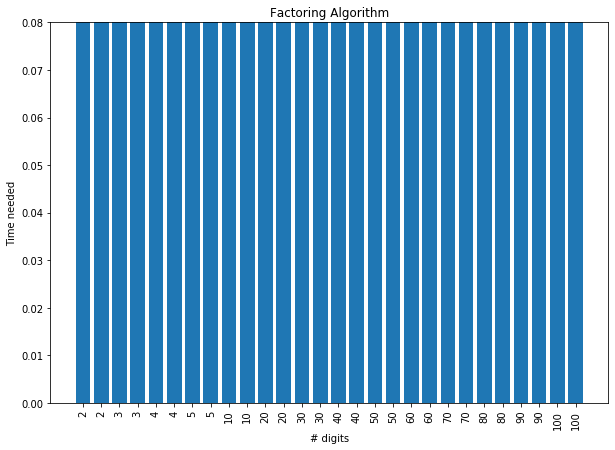

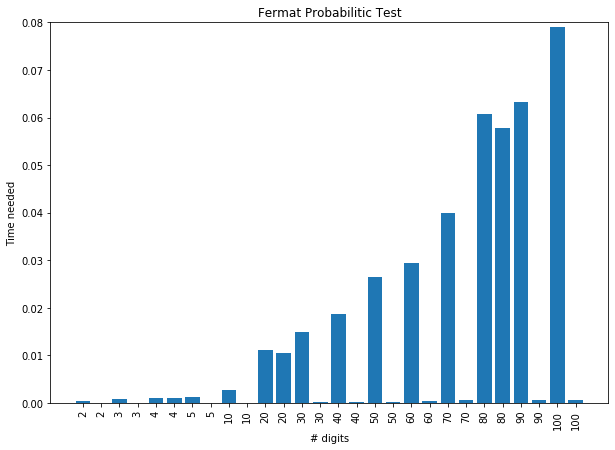

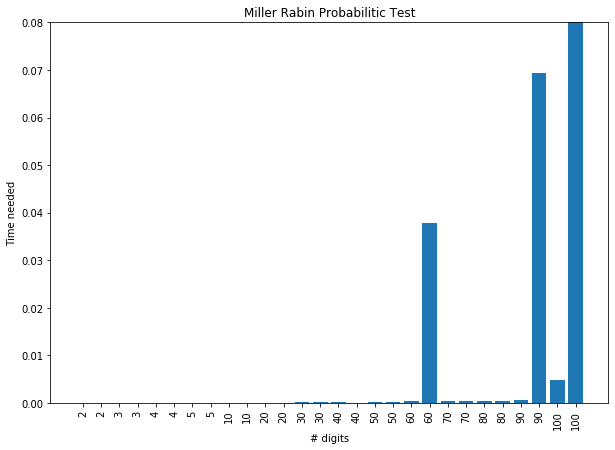

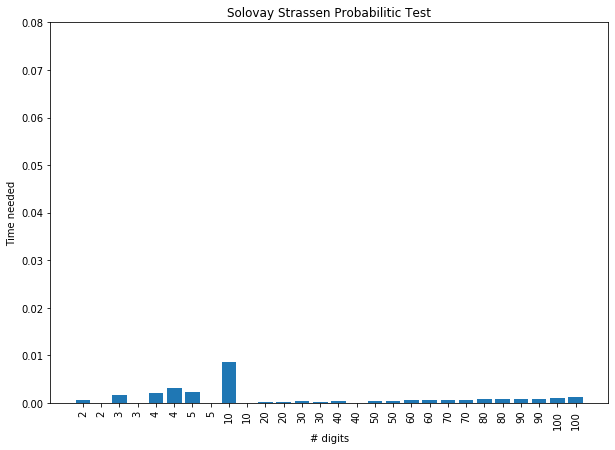

In [6]:
functions.barplot(d, times_factoring, 'factoring')

functions.barplot(d, times_fermat, 'fermat')

functions.barplot(d, times_rabin,'rabin')

functions.barplot(d, times_solovay, 'solovay')

### __Now let's look at tests performance on other primes of high magnitude__
We consider two prime numbers, that have a number of digits from 10 to 100

In [7]:
# FERMAT 
times_fermat, results_fermat = functions.evaluate_test('fermat', other_primes, composition_primes, m)

# MILLER-RABIN 
times_rabin, results_rabin = functions.evaluate_test('m-r', other_primes,composition_primes, m)

# SOLOVAY-STRASSEN 
times_solovay, results_solovay = functions.evaluate_test('s-s', other_primes, composition_primes, m)

Accuracy of:  Fermat Probabilitic Test is  1.0
Accuracy of:  Miller Rabin Probabilitic Test is  0.75
Accuracy of:  solovay Strassen Probabilitic Test is  0.1


Plotting time needed for every #digit number

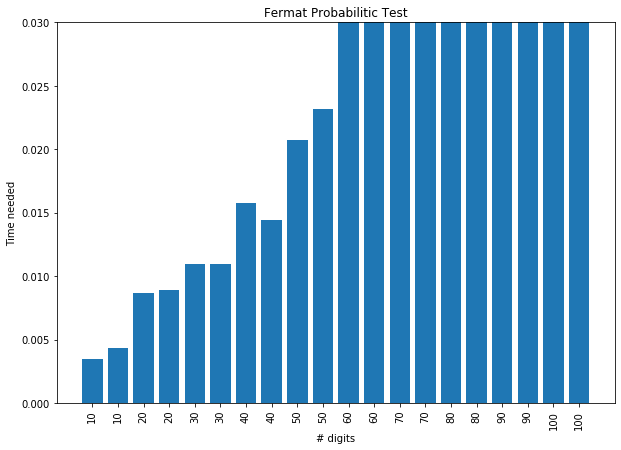

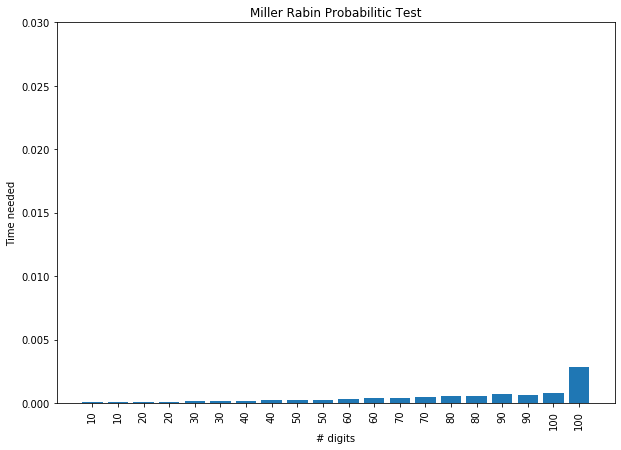

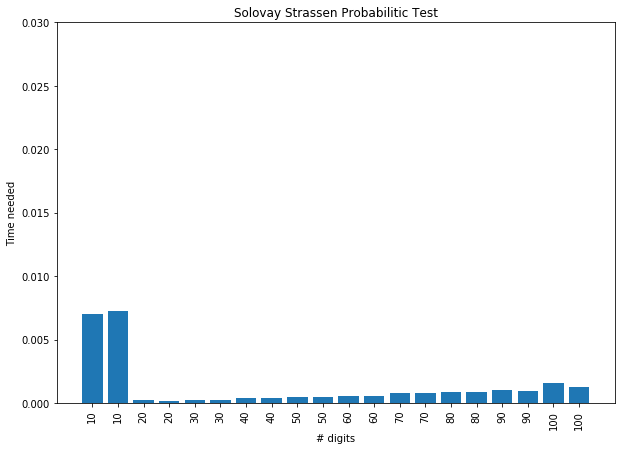

In [8]:
functions.barplot(d_others, times_fermat, 'fermat')

functions.barplot(d_others, times_rabin,'rabin')

functions.barplot(d_others, times_solovay, 'solovay')

### __Now let's look at tests performance on other composites of high magnitude__
We consider two composite numbers, that have a number of digits from 10 to 100

In [9]:
# FERMAT 
times_fermat, results_fermat = functions.evaluate_test('fermat', other_composites,composition_composite, m)

# MILLER-RABIN 
times_rabin, results_rabin = functions.evaluate_test('m-r', other_composites,composition_composite, m)

# SOLOVAY-STRASSEN 
times_solovay, results_solovay = functions.evaluate_test('s-s', other_composites,composition_composite, m)

Accuracy of:  Fermat Probabilitic Test is  1.0
Accuracy of:  Miller Rabin Probabilitic Test is  0.7
Accuracy of:  solovay Strassen Probabilitic Test is  1.0


Plotting time needed for every #digit number

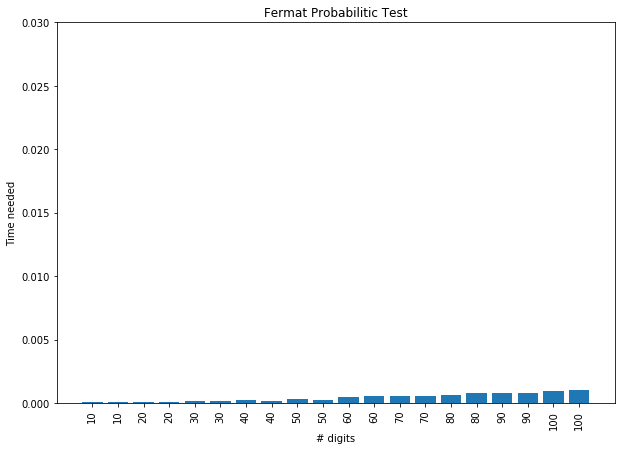

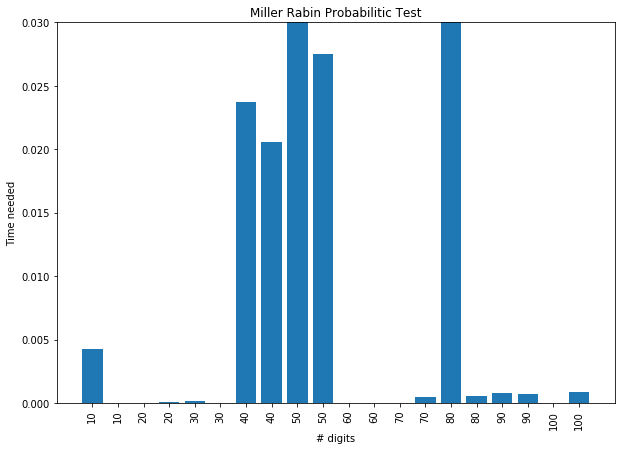

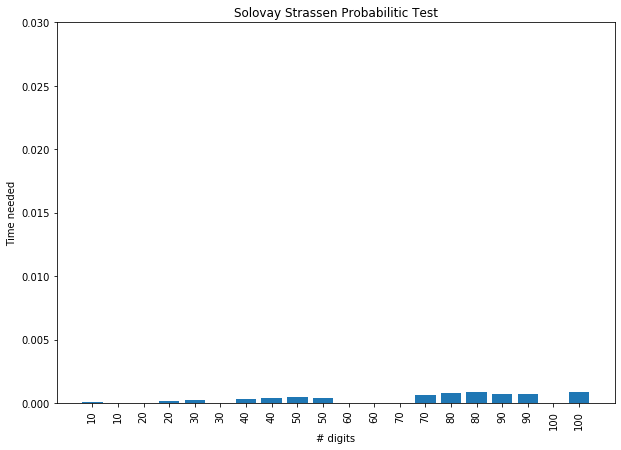

In [10]:
functions.barplot(d_others, times_fermat, 'fermat')

functions.barplot(d_others, times_rabin,'rabin')

functions.barplot(d_others, times_solovay, 'solovay')

# __Tests's performances on special numbers__

An example of what I was saying before, 561 is Carmichael number that fools Fermat Test

In [11]:
print(functions.fermat_test(561))

True


Now let's see more concrete examples on special numbers

In [12]:
# FERMAT 
times_fermat_special, results_sp_fermat = functions.evaluate_test('fermat', special_numbers,special_form, m)

# MILLER-RABIN 
times_rabin_special, results_sp_rabin = functions.evaluate_test('m-r',special_numbers,special_form, m)

# SOLOVAY-STRASSEN 
times_solovay_special, results_sp_solovay = functions.evaluate_test('s-s', special_numbers,special_form, m)

Accuracy of:  Fermat Probabilitic Test is  0.9583333333333334
Accuracy of:  Miller Rabin Probabilitic Test is  0.7083333333333334
Accuracy of:  solovay Strassen Probabilitic Test is  0.7916666666666666


Plotting time needed for every #digit number

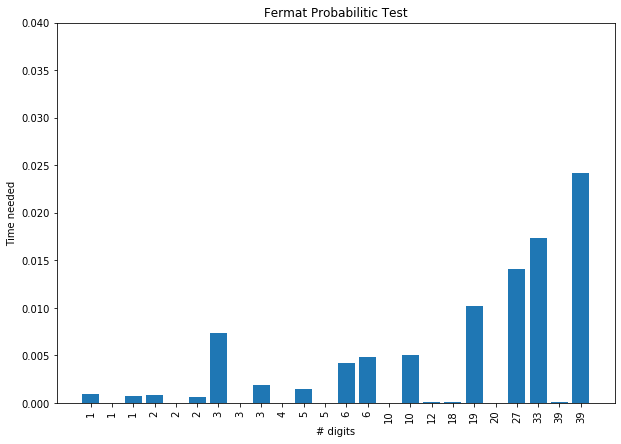

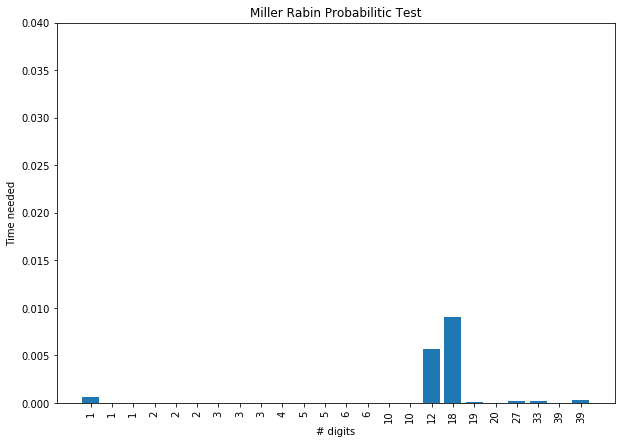

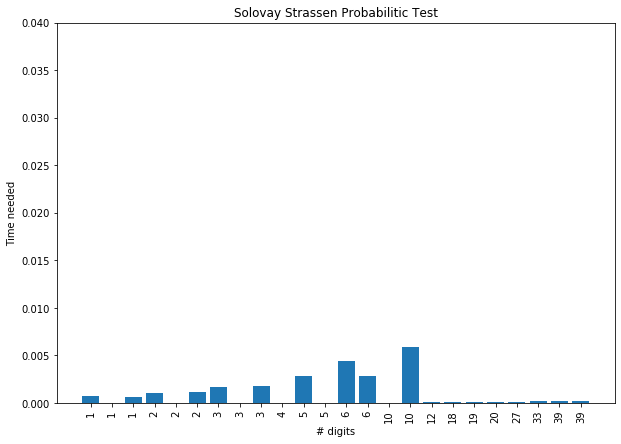

In [13]:
functions.barplot(d_special, times_fermat_special, 'fermat')

functions.barplot(d_special, times_rabin_special, 'rabin')

functions.barplot(d_special, times_solovay_special,  'solovay')

# In conclusion 

In theory Miller Rabin is the best among the three probabilistic primality tests, in terms of running time and probability error. We have now seen that this statement is true also in practice, even if both Solovay Strassen and Fermat test performed really well.

| Test | Pros | Cons | Computational Complexity | Probability of Error |
| --- | --- | --- | --- | --- |
| Fermat | Fast | Carmichael numbers <br> It cannot determine the number of Fermat liars for a pseudoprime| $\mathcal{O}(m\cdot \log^3(n))$ | Probability of failure for Carmichael numbers is 1 |
| Miller-Rabin | Very fast<br>Very small probability of error<br>Strong-pseudoprimes are fewer than Pseudoprimes | Strong-pseudoprimes fools it| $\tilde{\mathcal{O}}(m\cdot \log^2(n)))$ | $<4^{-m}$|
| Solovay-Strassen | Fast <br> Euler pseudoprimes are much less dense than pseudoprimes | Euler Pseudoprime fools it | $\mathcal{O}(m\cdot \log^3(n))$| $<2^{-m}$ |

References:
- [1] [Framework for Evaluation and Comparison of Primality Testing Algorithms](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7168472)
- [2] [Schönhage, A., Strassen, V. Schnelle Multiplikation großer Zahlen. Computing 7, 281–292 (1971)](https://en.wikipedia.org/wiki/Sch%C3%B6nhage%E2%80%93Strassen_algorithm).
- [3] [Louis Monier, Evaluation and comparison of two efficient probabilistic primality testing algorithms,Theoretical Computer Science, Volume 12, Issue 1, 1980](https://doi.org/10.1016/0304-3975(80)90007-9)
- [4] [Riley Worthington, Primality Testing: Theory, Complexity, and Applications](https://www.whitman.edu/documents/Academics/Mathematics/2018/Worthington.pdf)
- [5] [Miller-Rabin Test, wikipedia](https://en.wikipedia.org/wiki/Miller%E2%80%93Rabin_primality_test#Complexity)
- [6] [Prime numbers with a number of digits]( https://primes.utm.edu/lists/small/small.html)
- [7] [Random numbers with a number of digits]( https://numbergenerator.org/random-100-digit-number-generator#!numbers=2&length=100&addfilters=)
